# Import 

Before running the following cells you must install requirements.txt with: 'pip install -r requirements.txt'

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import time

color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']
from fredapi import Fred

from dotenv import load_dotenv
import os

plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 500)

from datetime import datetime, timedelta
import calendar

import plotly.io as pio 
pio.renderers.default = 'notebook'

To acces Fred API you must register and obtain your own personal and unique key from https://fred.stlouisfed.org/docs/api/api_key.html

Then you have to create an '.env' file in your directory so you can import fred_key using dotenv.

In [24]:
fred_api_key = 'put_your_key_here'
# load env variables 
load_dotenv() 
fred_api_key = os.getenv("fred_api_key")
print(fred_api_key)

4fc356a5003ef269ea9234d9df71576f


# 1. Fred Object

In [25]:
fred = Fred(api_key=fred_api_key)

# 1.1 Search data

In [26]:
sp_search = fred.search('S&P', limit=1000, order_by='popularity')
sp_search.head()

id realtime_start realtime_end  \
series id                                                    
BAMLH0A0HYM2      BAMLH0A0HYM2     2024-05-01   2024-05-01   
CSUSHPINSA          CSUSHPINSA     2024-05-01   2024-05-01   
SP500                    SP500     2024-05-01   2024-05-01   
MEHOINUSA672N    MEHOINUSA672N     2024-05-01   2024-05-01   
BAMLH0A0HYM2EY  BAMLH0A0HYM2EY     2024-05-01   2024-05-01   

                                                            title  \
series id                                                           
BAMLH0A0HYM2    ICE BofA US High Yield Index Option-Adjusted S...   
CSUSHPINSA      S&P CoreLogic Case-Shiller U.S. National Home ...   
SP500                                                     S&P 500   
MEHOINUSA672N   Real Median Household Income in the United States   
BAMLH0A0HYM2EY       ICE BofA US High Yield Index Effective Yield   

               observation_start observation_end     frequency  \
series id                                                        
BAMLH0A0HYM2          1996-12-31      2024-04-30  Daily, Close   
CSUSHPINSA            1987-01-01      2024-02-01       Monthly   
SP500                 2014-05-02      2024-05-01  Daily, Close   
MEHOINUSA672N         1984-01-01      2022-01-01        Annual   
BAMLH0A0HYM2EY        1996-12-31      2024-04-30  Daily, Close   

               frequency_short                           units  \
series id                                                        
BAMLH0A0HYM2                 D                         Percent   
CSUSHPINSA                   M              Index Jan 2000=100   
SP500                        D                           Index   
MEHOINUSA672N                A  2022 CPI-U-RS Adjusted Dollars   
BAMLH0A0HYM2EY               D                         Percent   

                             units_short      seasonal_adjustment  \
series id                                                           
BAMLH0A0HYM2                           %  Not Seasonally Adjusted   
CSUSHPINSA            Index Jan 2000=100  Not Seasonally Adjusted   
SP500                              Index  Not Seasonally Adjusted   
MEHOINUSA672N   2022 CPI-U-RS Adjusted $  Not Seasonally Adjusted   
BAMLH0A0HYM2EY                         %  Not Seasonally Adjusted   

               seasonal_adjustment_short               last_updated  \
series id                                                             
BAMLH0A0HYM2                         NSA  2024-05-01 09:23:14-05:00   
CSUSHPINSA                           NSA  2024-04-30 08:12:01-05:00   
SP500                                NSA  2024-05-01 19:10:58-05:00   
MEHOINUSA672N                        NSA  2023-09-12 13:48:02-05:00   
BAMLH0A0HYM2EY                       NSA  2024-05-01 09:23:13-05:00   

               popularity                                              notes  
series id                                                                     
BAMLH0A0HYM2           92  The ICE BofA Option-Adjusted Spreads (OASs) ar...  
CSUSHPINSA             88  For more information regarding the index, plea...  
SP500                  83  The observations for the S&P 500 represent the...  
MEHOINUSA672N          83  Household data are collected as of March.  As ...  
BAMLH0A0HYM2EY         82  This data represents the effective yield of th...

# 2. Pull raw data & plot

<Axes: title={'center': 'S&P 500'}>

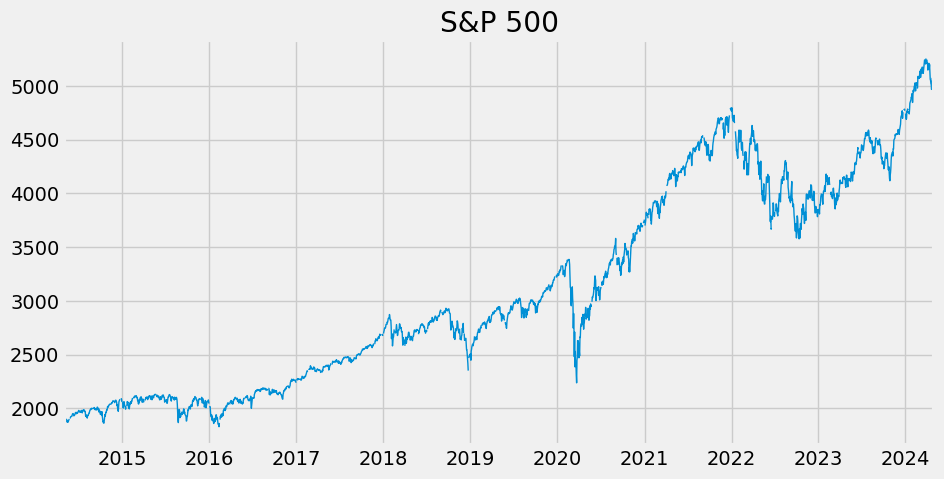

In [27]:
sp500 = fred.get_series(series_id='SP500')
sp500.plot(figsize=(10,5), title='S&P 500', lw=1)

# 3. Pull and join multiple data series

In [28]:
uemp_show = fred.search('unemployment', limit=1000)
uemp_show.head()

id realtime_start realtime_end  \
series id                                          
UNRATE        UNRATE     2024-05-01   2024-05-01   
UNRATENSA  UNRATENSA     2024-05-01   2024-05-01   
UNEMPLOY    UNEMPLOY     2024-05-01   2024-05-01   
NROU            NROU     2024-05-01   2024-05-01   
CCSA            CCSA     2024-05-01   2024-05-01   

                                             title observation_start  \
series id                                                              
UNRATE                           Unemployment Rate        1948-01-01   
UNRATENSA                        Unemployment Rate        1948-01-01   
UNEMPLOY                        Unemployment Level        1948-01-01   
NROU              Noncyclical Rate of Unemployment        1949-01-01   
CCSA       Continued Claims (Insured Unemployment)        1967-01-07   

          observation_end                frequency frequency_short  \
series id                                                            
UNRATE         2024-03-01                  Monthly               M   
UNRATENSA      2024-03-01                  Monthly               M   
UNEMPLOY       2024-03-01                  Monthly               M   
NROU           2034-10-01                Quarterly               Q   
CCSA           2024-04-13  Weekly, Ending Saturday               W   

                          units        units_short      seasonal_adjustment  \
series id                                                                     
UNRATE                  Percent                  %      Seasonally Adjusted   
UNRATENSA               Percent                  %  Not Seasonally Adjusted   
UNEMPLOY   Thousands of Persons  Thous. of Persons      Seasonally Adjusted   
NROU                    Percent                  %  Not Seasonally Adjusted   
CCSA                     Number             Number      Seasonally Adjusted   

          seasonal_adjustment_short               last_updated popularity  \
series id                                                                   
UNRATE                           SA  2024-04-05 07:50:02-05:00         95   
UNRATENSA                       NSA  2024-04-05 07:50:24-05:00         58   
UNEMPLOY                         SA  2024-04-05 07:50:18-05:00         71   
NROU                            NSA  2024-02-08 14:46:04-06:00         69   
CCSA                             SA  2024-04-25 07:48:04-05:00         74   

                                                       notes  
series id                                                     
UNRATE     The unemployment rate represents the number of...  
UNRATENSA  The unemployment rate represents the number of...  
UNEMPLOY   The series comes from the 'Current Population ...  
NROU       Starting with the July, 2021 report: An Update...  
CCSA       Continued claims, also referred to as insured ...

<Axes: title={'center': 'Unemployment UNRATE'}>

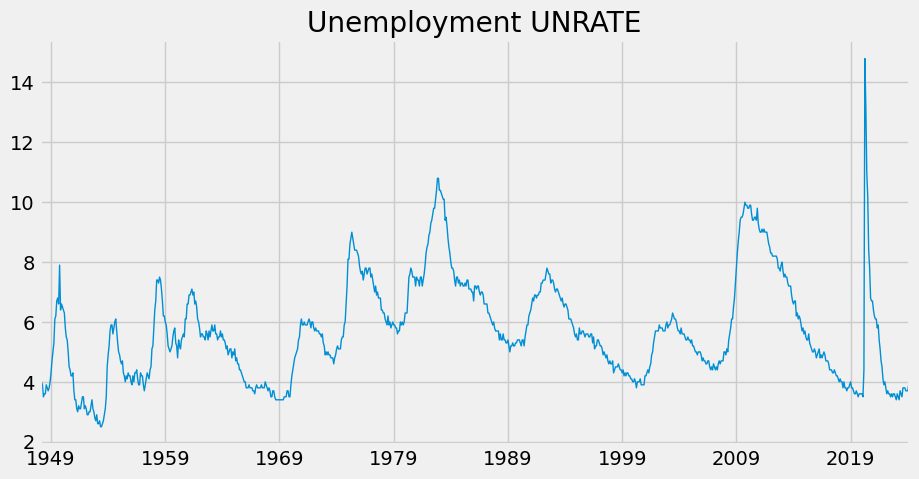

In [29]:
unrate = fred.get_series('UNRATE')
unrate.plot(figsize=(10,5), title='Unemployment UNRATE', lw=1)

In [30]:
unemp_df = fred.search('unemployment rate state', filter=('frequency', 'Monthly'))
unemp_df.head()

id realtime_start realtime_end  \
series id                                              
UNRATE            UNRATE     2024-05-01   2024-05-01   
UNRATENSA      UNRATENSA     2024-05-01   2024-05-01   
LNS14000006  LNS14000006     2024-05-01   2024-05-01   
UNEMPLOY        UNEMPLOY     2024-05-01   2024-05-01   
LNU04000006  LNU04000006     2024-05-01   2024-05-01   

                                                     title observation_start  \
series id                                                                      
UNRATE                                   Unemployment Rate        1948-01-01   
UNRATENSA                                Unemployment Rate        1948-01-01   
LNS14000006  Unemployment Rate - Black or African American        1972-01-01   
UNEMPLOY                                Unemployment Level        1948-01-01   
LNU04000006  Unemployment Rate - Black or African American        1972-01-01   

            observation_end frequency frequency_short                 units  \
series id                                                                     
UNRATE           2024-03-01   Monthly               M               Percent   
UNRATENSA        2024-03-01   Monthly               M               Percent   
LNS14000006      2024-03-01   Monthly               M               Percent   
UNEMPLOY         2024-03-01   Monthly               M  Thousands of Persons   
LNU04000006      2024-03-01   Monthly               M               Percent   

                   units_short      seasonal_adjustment  \
series id                                                 
UNRATE                       %      Seasonally Adjusted   
UNRATENSA                    %  Not Seasonally Adjusted   
LNS14000006                  %      Seasonally Adjusted   
UNEMPLOY     Thous. of Persons      Seasonally Adjusted   
LNU04000006                  %  Not Seasonally Adjusted   

            seasonal_adjustment_short               last_updated popularity  \
series id                                                                     
UNRATE                             SA  2024-04-05 07:50:02-05:00         95   
UNRATENSA                         NSA  2024-04-05 07:50:24-05:00         58   
LNS14000006                        SA  2024-04-05 07:50:16-05:00         72   
UNEMPLOY                           SA  2024-04-05 07:50:18-05:00         71   
LNU04000006                       NSA  2024-04-05 07:50:55-05:00         23   

                                                         notes  
series id                                                       
UNRATE       The unemployment rate represents the number of...  
UNRATENSA    The unemployment rate represents the number of...  
LNS14000006  The series comes from the 'Current Population ...  
UNEMPLOY     The series comes from the 'Current Population ...  
LNU04000006  The series comes from the 'Current Population ...

In [31]:
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate in')]
unemp_df

id realtime_start realtime_end  \
series id                                                                
CAUR                                  CAUR     2024-05-01   2024-05-01   
TXUR                                  TXUR     2024-05-01   2024-05-01   
NYUR                                  NYUR     2024-05-01   2024-05-01   
FLUR                                  FLUR     2024-05-01   2024-05-01   
PAUR                                  PAUR     2024-05-01   2024-05-01   
OHUR                                  OHUR     2024-05-01   2024-05-01   
MIUR                                  MIUR     2024-05-01   2024-05-01   
ALUR                                  ALUR     2024-05-01   2024-05-01   
MAUR                                  MAUR     2024-05-01   2024-05-01   
NCUR                                  NCUR     2024-05-01   2024-05-01   
ILUR                                  ILUR     2024-05-01   2024-05-01   
NJUR                                  NJUR     2024-05-01   2024-05-01   
GAUR                                  GAUR     2024-05-01   2024-05-01   
COUR                                  COUR     2024-05-01   2024-05-01   
AZUR                                  AZUR     2024-05-01   2024-05-01   
WIUR                                  WIUR     2024-05-01   2024-05-01   
VAUR                                  VAUR     2024-05-01   2024-05-01   
KYUR                                  KYUR     2024-05-01   2024-05-01   
SCUR                                  SCUR     2024-05-01   2024-05-01   
NMUR                                  NMUR     2024-05-01   2024-05-01   
MNUR                                  MNUR     2024-05-01   2024-05-01   
TNUR                                  TNUR     2024-05-01   2024-05-01   
WAUR                                  WAUR     2024-05-01   2024-05-01   
MDUR                                  MDUR     2024-05-01   2024-05-01   
ORUR                                  ORUR     2024-05-01   2024-05-01   
WVUR                                  WVUR     2024-05-01   2024-05-01   
NVUR                                  NVUR     2024-05-01   2024-05-01   
ARUR                                  ARUR     2024-05-01   2024-05-01   
OKUR                                  OKUR     2024-05-01   2024-05-01   
MOUR                                  MOUR     2024-05-01   2024-05-01   
AKUR                                  AKUR     2024-05-01   2024-05-01   
IAUR                                  IAUR     2024-05-01   2024-05-01   
UTUR                                  UTUR     2024-05-01   2024-05-01   
PRUR                                  PRUR     2024-05-01   2024-05-01   
INUR                                  INUR     2024-05-01   2024-05-01   
LAUR                                  LAUR     2024-05-01   2024-05-01   
HIUR                                  HIUR     2024-05-01   2024-05-01   
LASMT261982000000003  LASMT261982000000003     2024-05-01   2024-05-01   
NDUR                                  NDUR     2024-05-01   2024-05-01   
MTUR                                  MTUR     2024-05-01   2024-05-01   
DCUR                                  DCUR     2024-05-01   2024-05-01   
MSUR                                  MSUR     2024-05-01   2024-05-01   
MEUR                                  MEUR     2024-05-01   2024-05-01   
NEUR                                  NEUR     2024-05-01   2024-05-01   
LASMT391746000000003  LASMT391746000000003     2024-05-01   2024-05-01   
CTUR                                  CTUR     2024-05-01   2024-05-01   
IDUR                                  IDUR     2024-05-01   2024-05-01   
NHUR                                  NHUR     2024-05-01   2024-05-01   
RIUR                                  RIUR     2024-05-01   2024-05-01   
KSUR                                  KSUR     2024-05-01   2024-05-01   
WYUR                                  WYUR     2024-05-01   2024-05-01   
DEUR                                  DEUR     2024-05-01   2024-05-01   
VTUR                                  VTUR  

In [32]:
all_results = []    # stores al pandas dataframes results

for myid in unemp_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    #time.sleep(0.1)
    all_results.append(results)

<Axes: title={'center': 'NaN data'}>

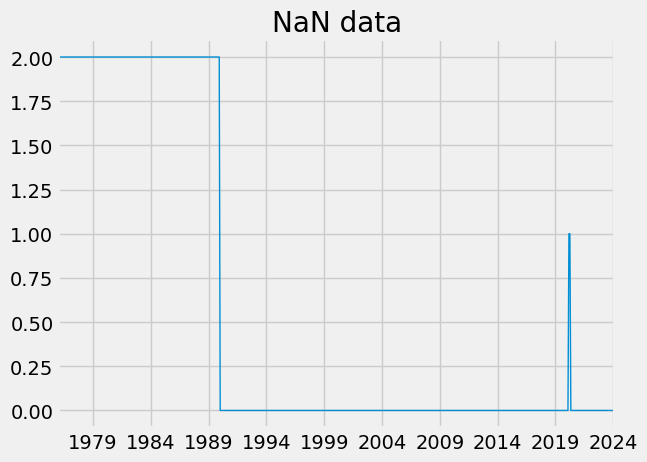

In [33]:
# concat all results
uemp_results = pd.concat(all_results, axis=1)
uemp_states = uemp_results.copy()
# Show if there are any NaN values
uemp_states.isna().sum(axis=1).plot(title='NaN data', lw=1)

In [34]:
# drop NaN
uemp_states = uemp_states.dropna()
# states names
id_to_state = unemp_df['title'].str.replace('Unemployment Rate in ','').to_dict()
uemp_states.columns = [id_to_state[c] for c in uemp_states.columns]
px.line(uemp_states, title='Unemployment Rate by State')

# 4. Pull Last Month Unemployment by State

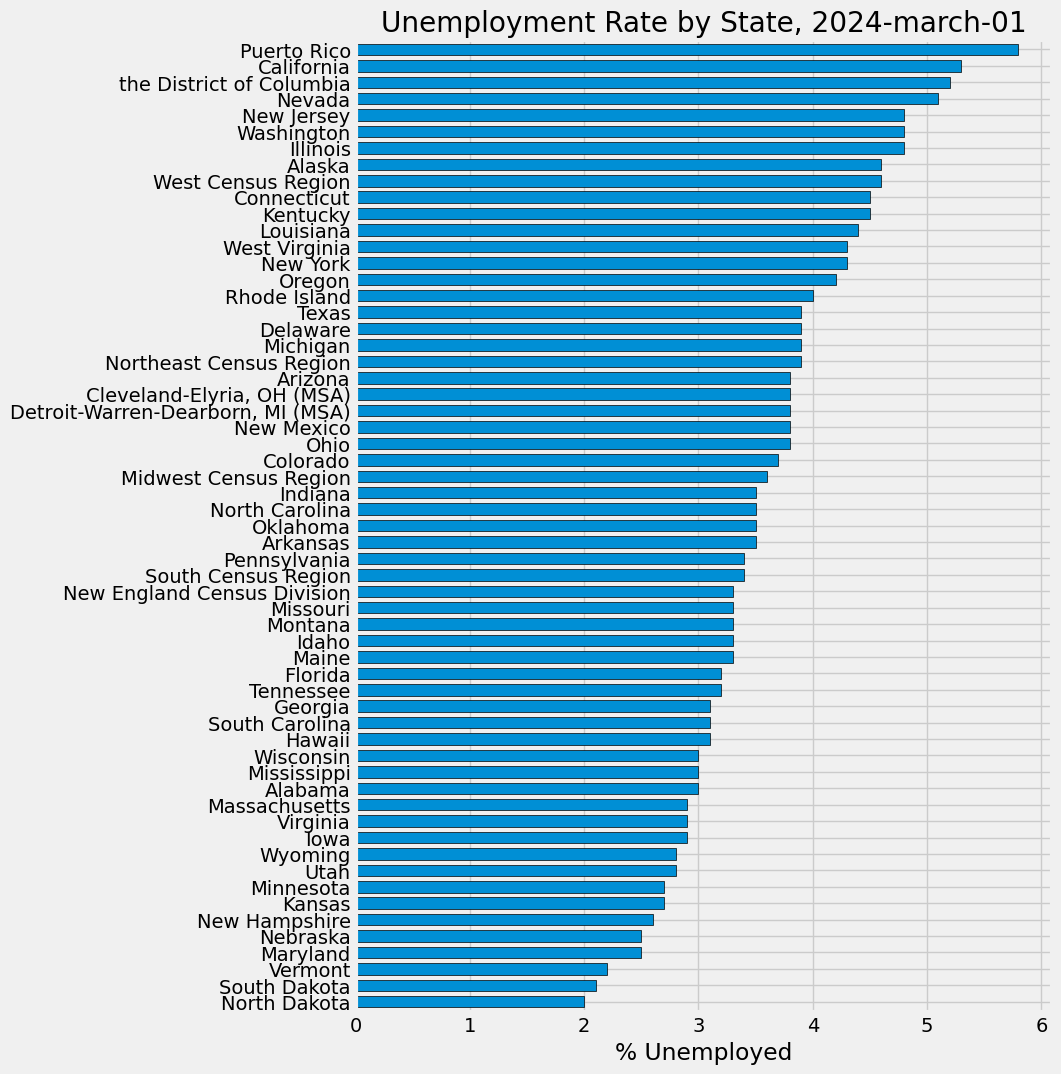

In [35]:
# current date
current_date = datetime.now()
last_month_date = current_date - timedelta(days=35)
date = last_month_date.strftime('%Y-%m-01')
month = calendar.month_name[last_month_date.month]
title_date = f"{date[:4]}-{month.lower()}-{date[-2:]}"

ax = uemp_states.loc[uemp_states.index == date].T \
    .sort_values(date) \
    .plot(kind='barh', figsize=(8, 12), width=0.7, edgecolor='black',
          title='Unemployment Rate by State, ' + title_date)
ax.legend().remove()
ax.set_xlabel('% Unemployed')
plt.show()


# 5. Pull participation rate

In [36]:
part_df = fred.search('participation rate state', filter=('frequency', 'Monthly'))
part_df = part_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
part_df = part_df.loc[part_df['title'].str.contains('Labor Force Participation Rate for ')]

part_all_results = []    # stores al pandas dataframes results

for myid in part_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    #time.sleep(0.1)
    part_all_results.append(results)

part_results = pd.concat(part_all_results, axis=1)
part_states = part_results.copy()

# drop NaN
part_states = part_states.dropna()

# states names
part_id_to_state = part_df['title'].str.replace('Labor Force Participation Rate for ','').to_dict()
part_states.columns = [part_id_to_state[c] for c in part_states.columns if c in part_id_to_state.keys()]
px.line(part_states, title='Participation Rate by State')

# 6. Plot Unemployment vs Participation for the last 4 years

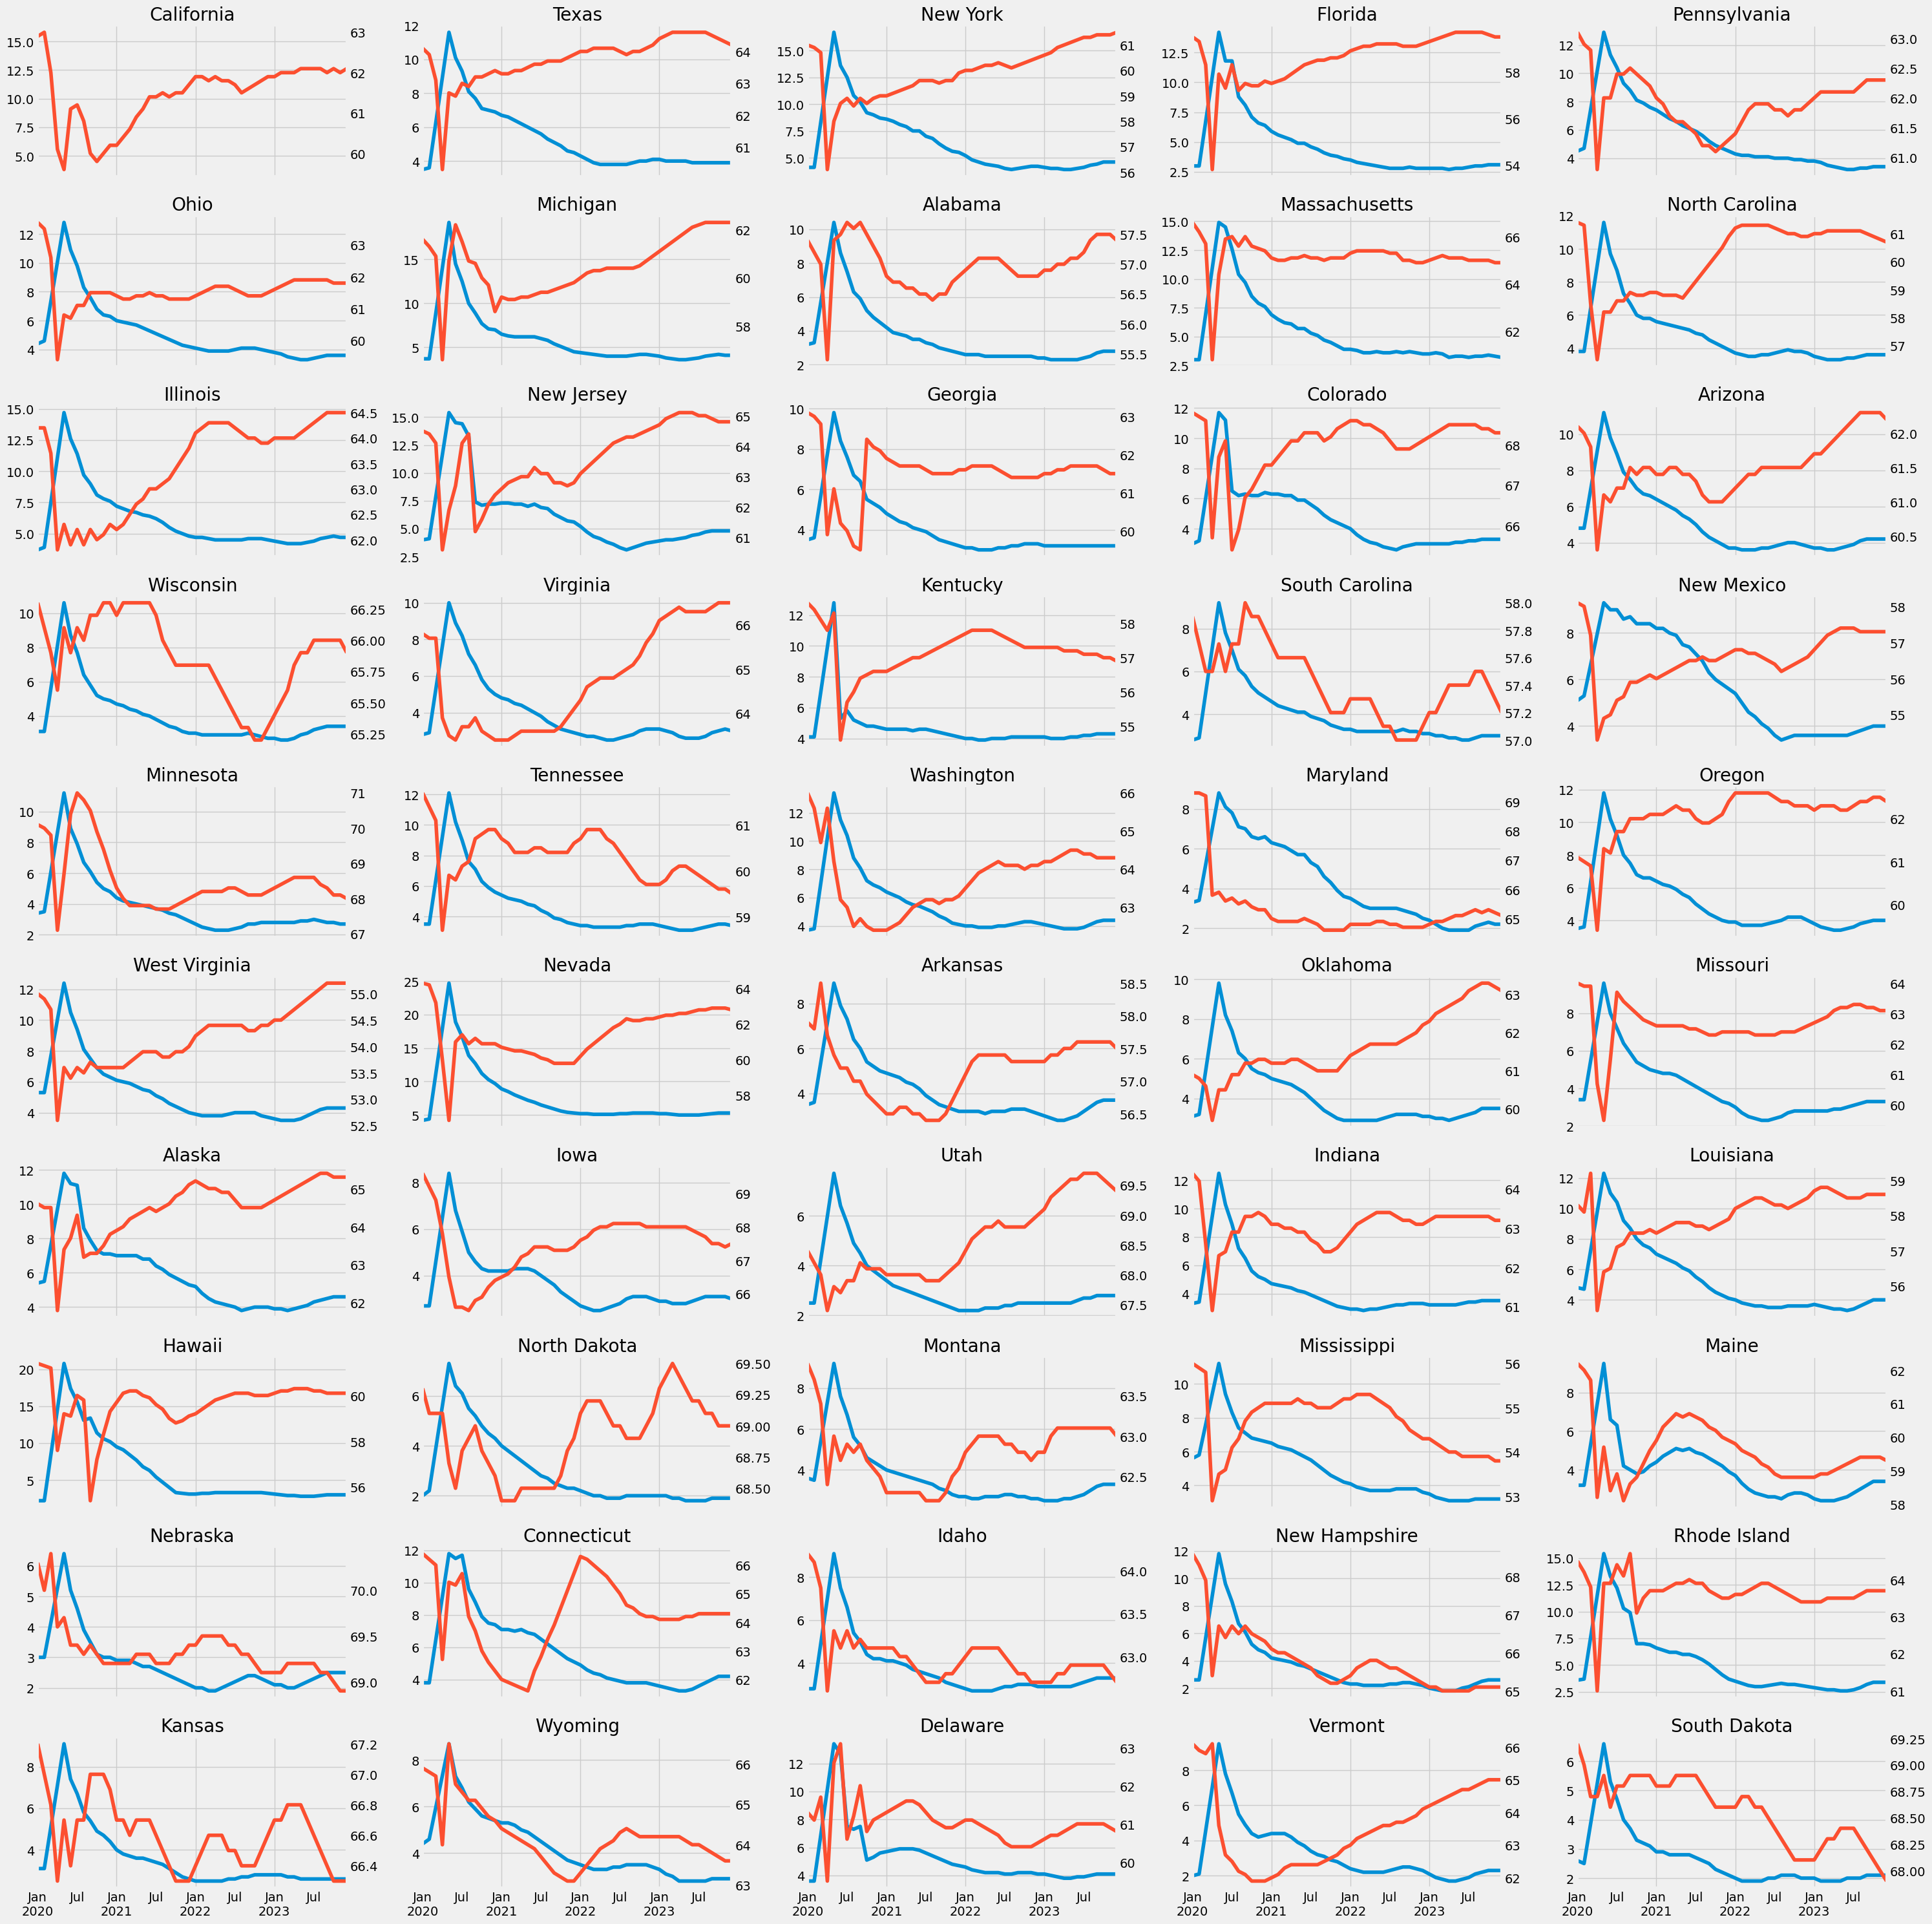

In [37]:
# Fix DC
uemp_states = uemp_states.rename(columns={'the District of Columbia':'District Of Columbia'})
year = current_date.year
year_gap = current_date.year - 4

fig, axs = plt.subplots(10, 5, figsize=(30, 30), sharex=True)
axs = axs.flatten()

i = 0
for state in uemp_states.columns:
    if state in ["District Of Columbia","Puerto Rico"]:
        continue
    if 'MSA' in state:
        continue
    if i < len(axs):          
        ax2 = axs[i].twinx() 
        uemp_states.query('index >= @year_gap and index < @year')[state] \
            .plot(ax=axs[i], label='Unemployment')
        part_states.query('index >= @year_gap and index < @year')[state] \
            .plot(ax=ax2, label='Participation', color=color_pal[1])
        ax2.grid(False)
        axs[i].set_title(state)
        i += 1
    else:
        break
plt.tight_layout()
plt.show()